In [3]:
%load_ext autoreload
%autoreload 2
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from LAMB_Exec import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


ImportError: cannot import name 'SchedulerType' from 'transformers' (/Users/lihaonan/miniconda3/lib/python3.8/site-packages/transformers/__init__.py)

# Debug model

In [4]:
parser = argparse.ArgumentParser(description='TourQue Executor')

parser.add_argument("--batch_size", type=int, default=4)
parser.add_argument("--gradient_accumulation_steps", type=int, default=8)
parser.add_argument("--seed", type=int, default=42)
parser.add_argument('--loss', type=str, default="nll")
parser.add_argument("--margin", type=float, default=1.0) # if use margin ranking loss
parser.add_argument("--lr", type=float, default=5e-5)
parser.add_argument("--lr_scheduler_type", type=SchedulerType, default="linear",
        choices=["linear", "cosine", "cosine_with_restarts", "polynomial", "constant", "constant_with_warmup"])
parser.add_argument("--num_warmup_steps", type=float, default=0)
parser.add_argument("--dropout", type=float, default=0.2)
parser.add_argument("--num_training_steps", type=int, default=7100)
# contrastive
parser.add_argument("--samples_per_qa", type=int, default=5)
parser.add_argument("--hard_negatives_per_qa", type=int, default=1)
parser.add_argument("--score_method", type=str, default="dot", choices=['dot','bilinear','cosine'])
# textual module
parser.add_argument("--transformer_model", type=str, default='distilbert-base-uncased')
parser.add_argument("--max_question_length", type=int, default=384)
parser.add_argument("--max_entity_length", type=int, default=512)
parser.add_argument("--n_cluster_reviews", type=int, default=0)
parser.add_argument("--encode_entity_name", action="store_true")
# location module
parser.add_argument("--location", action="store_true")
parser.add_argument("--max_locations", type=int, default=5)
# distance module
parser.add_argument("--distance", action="store_true")
parser.add_argument("--haversine_distance", action="store_true")
parser.add_argument("--dist_weight", type=float, default=0.2)
# test
parser.add_argument("--test_mode", action="store_true")
parser.add_argument("--debug", action="store_true")
parser.add_argument("--test_batch_size", type=int, default=16)
parser.add_argument("--batch_size_save_entity", type=int, default=24)
parser.add_argument("--save_every", type=int, default=100)
parser.add_argument("--save_after", type=int, default=900)
parser.add_argument("--eval_type", default='std', choices=['std','std+','random','random+','full'])
# other
parser.add_argument("--use_wandb", action="store_true")
parser.add_argument('--output_dir', type=str, default="")
parser.add_argument('--data_dir', type=str, default="/Users/haonanl5/Downloads/tourqa/data/")
parser.add_argument('--test_file', type=str, default="test_loc.json")
parser.add_argument('--train_file', type=str, default="train_loc.json")
parser.add_argument('--valid_file', type=str, default="valid_loc.json")
parser.add_argument("--id_file", type=str,default="entity_id.json")
parser.add_argument("--emb_file", type=str,default="entity_emb.np")
parser.add_argument("--knowledge_file", type=str,default="TourQue_Knowledge_Cluster.json")
parser.add_argument("--cities_lat_long_file", type=str, default="final_cities_lat_long.json")


opts = parser.parse_args('  \
    --loss nll \
    --score_method dot \
    --seed 42 \
    --eval_type std \
	--batch_size 2 \
	--gradient_accumulation_steps 8 \
    --max_locations 5 \
    --dist_weight 0.1 \
	--samples_per_qa 3 \
    --hard_negatives_per_qa 0 \
--data_dir /home/haonanl5/tourqa/data'.split())


opts = init_args(opts)

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(message)s',
                    datefmt='%m/%d/%Y %I:%M:%S',
                    handlers=[
                        logging.FileHandler(opts.log_file),
                        logging.StreamHandler()
                    ])

# Load Data
data_obj = Lamb_Data(opts=opts)
prep = Lamb_Prepare(opts, data_obj)
network = Lamb(opts)
network.load_state_dict(torch.load(os.path.join(opts.output_dir,f'{opts.prefix}.weights')))
network.to(opts.device)

# test_data = data_obj.load_data_from_files(opts.test_file, training=False, debug=opts.debug)
#test(opts, data_obj, prep, network, test_data)

NameError: name 'argparse' is not defined

In [5]:
a = {'1':1,'2':2}
a.pop('1')
a

{'2': 2}

In [11]:
training_data = data_obj.load_data_from_files(opts.train_file, training=True, debug=opts.debug)
train(opts, data_obj, prep, network, training_data, test_data)

Loading Training, Validation and Test Data from files.
Loading Samples from file: /home/haonanl5/tourqa/data/TourQue_QA_Pairs/train_loc.json


100%|██████████████████████████████████████████████████████████████████████████| 21396/21396 [00:02<00:00, 9329.23it/s]


Expand samples with candidates.


100%|█████████████████████████████████████████████████████████████████████████| 21105/21105 [00:00<00:00, 24051.75it/s]
05/21/2022 10:35:40 - ***** Running training *****
05/21/2022 10:35:40 -   Num examples = 21105
05/21/2022 10:35:40 -   Instantaneous batch size per device = 2
05/21/2022 10:35:40 -   Gradient Accumulation steps = 8


Data Generation took: 3.8893392086029053 seconds. QA Pairs/Posts: 21105
******
Data sample 0: question -- In three weeks I will be attending a conference at the Marriott downtown Mag Mile. We have a budge of $25 a day for food. We are all teachers. Any CHEAP suggestions for restaurants/café for the three days we will stay there. I like mainly American Style dining (pizza, sandwiches, breakfast fare, pasta, pastry) not a fan of sea food or spicy food. We will not have a car and in most cases fairly limited time for meals. Any and all suggestions greatly appreciated.
Data sample 0: answer_entity_id -- 2_R_9967
Data sample 0: all_answer_entities -- {'2_R_9967', '2_R_2631'}
Data sample 0: all_answer_entity_list -- ['2_R_2631', '2_R_9967']
Data sample 0: candidates (subset) -- ['10_H_76440', '22_R_3075']
******

******
Data sample 1: question -- In three weeks I will be attending a conference at the Marriott downtown Mag Mile. We have a budge of $25 a day for food. We are all teachers. Any 

05/21/2022 10:35:42 - Global step: 1, Loss: 15.878191590309143
05/21/2022 10:35:44 - Global step: 2, Loss: 13.151074588298798
05/21/2022 10:35:46 - Global step: 3, Loss: 9.077831208705902
05/21/2022 10:35:49 - Global step: 4, Loss: 4.437207579612732
05/21/2022 10:35:51 - Global step: 5, Loss: 3.096188075840473
05/21/2022 10:35:53 - Global step: 6, Loss: 1.9657780975103378
05/21/2022 10:35:55 - Global step: 7, Loss: 1.4509596154093742
05/21/2022 10:35:57 - Global step: 8, Loss: 1.2778785973787308
05/21/2022 10:36:00 - Global step: 9, Loss: 1.0706065967679024
05/21/2022 10:36:02 - Global step: 10, Loss: 0.9720774218440056
05/21/2022 10:36:04 - Global step: 11, Loss: 0.9952706173062325
05/21/2022 10:36:06 - Global step: 12, Loss: 0.9799965769052505
05/21/2022 10:36:09 - Global step: 13, Loss: 0.91811902821064
05/21/2022 10:36:11 - Global step: 14, Loss: 0.8640283867716789
05/21/2022 10:36:13 - Global step: 15, Loss: 0.7425031289458275
05/21/2022 10:36:15 - Global step: 16, Loss: 0.8676551

05/21/2022 10:40:34 - Global step: 129, Loss: 0.4234402262227377
05/21/2022 10:40:36 - Global step: 130, Loss: 0.21183882901095785
05/21/2022 10:40:39 - Global step: 131, Loss: 0.3094257520278916
05/21/2022 10:40:41 - Global step: 132, Loss: 0.40566449971356633
05/21/2022 10:40:43 - Global step: 133, Loss: 0.18700280884513631
05/21/2022 10:40:46 - Global step: 134, Loss: 0.29573563238955103
05/21/2022 10:40:48 - Global step: 135, Loss: 0.1785631966777146
05/21/2022 10:40:50 - Global step: 136, Loss: 0.33984838642936666
05/21/2022 10:40:53 - Global step: 137, Loss: 0.13377561868674093
05/21/2022 10:40:55 - Global step: 138, Loss: 0.3025989352436227
05/21/2022 10:40:57 - Global step: 139, Loss: 0.3410001657612156
05/21/2022 10:41:00 - Global step: 140, Loss: 0.12299411039816732
05/21/2022 10:41:02 - Global step: 141, Loss: 0.4026500241016038
05/21/2022 10:41:04 - Global step: 142, Loss: 0.19943159352988005
05/21/2022 10:41:07 - Global step: 143, Loss: 0.056433035773807205
05/21/2022 10:4

05/21/2022 10:45:24 - Global step: 254, Loss: 0.3954338371368067
05/21/2022 10:45:26 - Global step: 255, Loss: 0.15142365894280374
05/21/2022 10:45:29 - Global step: 256, Loss: 0.32004895668069366
05/21/2022 10:45:31 - Global step: 257, Loss: 0.10691959245014004
05/21/2022 10:45:33 - Global step: 258, Loss: 0.30916666077973787
05/21/2022 10:45:36 - Global step: 259, Loss: 0.28138221471635916
05/21/2022 10:45:38 - Global step: 260, Loss: 0.23192372704397712
05/21/2022 10:45:40 - Global step: 261, Loss: 0.2158539762494911
05/21/2022 10:45:43 - Global step: 262, Loss: 0.19294150618225103
05/21/2022 10:45:45 - Global step: 263, Loss: 0.10684889867206948
05/21/2022 10:45:47 - Global step: 264, Loss: 0.023207703528896673
05/21/2022 10:45:50 - Global step: 265, Loss: 0.050495614397732425
05/21/2022 10:45:52 - Global step: 266, Loss: 0.3051826707669534
05/21/2022 10:45:54 - Global step: 267, Loss: 0.16322556163777335
05/21/2022 10:45:57 - Global step: 268, Loss: 0.20387095065234462
05/21/2022 

05/21/2022 10:50:15 - Global step: 379, Loss: 0.1421679378945555
05/21/2022 10:50:18 - Global step: 380, Loss: 0.26544646406364336
05/21/2022 10:50:20 - Global step: 381, Loss: 0.25363868060230743
05/21/2022 10:50:22 - Global step: 382, Loss: 0.06412816949341504
05/21/2022 10:50:25 - Global step: 383, Loss: 0.02714809204917401
05/21/2022 10:50:27 - Global step: 384, Loss: 0.10148371961622615
05/21/2022 10:50:30 - Global step: 385, Loss: 0.05646180326675676
05/21/2022 10:50:32 - Global step: 386, Loss: 0.013219055470244712
05/21/2022 10:50:34 - Global step: 387, Loss: 0.18574646252893956
05/21/2022 10:50:37 - Global step: 388, Loss: 0.19770557625997753
05/21/2022 10:50:39 - Global step: 389, Loss: 0.04448755308953878
05/21/2022 10:50:41 - Global step: 390, Loss: 0.0357583058344062
05/21/2022 10:50:44 - Global step: 391, Loss: 0.051146463939232945
05/21/2022 10:50:46 - Global step: 392, Loss: 0.3725028595661115
05/21/2022 10:50:48 - Global step: 393, Loss: 0.11559996784563964
05/21/2022 

05/21/2022 10:55:07 - Global step: 504, Loss: 0.36899678907866473
05/21/2022 10:55:09 - Global step: 505, Loss: 0.43439325816689234
05/21/2022 10:55:12 - Global step: 506, Loss: 0.13846958874273696
05/21/2022 10:55:14 - Global step: 507, Loss: 0.5269770858712377
05/21/2022 10:55:16 - Global step: 508, Loss: 0.3511665328296658
05/21/2022 10:55:19 - Global step: 509, Loss: 0.2712608630245086
05/21/2022 10:55:21 - Global step: 510, Loss: 0.022562370020693834
05/21/2022 10:55:23 - Global step: 511, Loss: 0.030909006445654086
05/21/2022 10:55:26 - Global step: 512, Loss: 0.023597361152496887
05/21/2022 10:55:28 - Global step: 513, Loss: 0.08089542265679484
05/21/2022 10:55:30 - Global step: 514, Loss: 0.2634013994829729
05/21/2022 10:55:33 - Global step: 515, Loss: 0.02903234155382961
05/21/2022 10:55:35 - Global step: 516, Loss: 0.24984461306303274
05/21/2022 10:55:37 - Global step: 517, Loss: 0.4890563209228276
05/21/2022 10:55:39 - Global step: 518, Loss: 0.14337711385451257
05/21/2022 1

05/21/2022 10:59:57 - Global step: 629, Loss: 0.0785906319069909
05/21/2022 10:59:59 - Global step: 630, Loss: 0.2585785770788789
05/21/2022 11:00:02 - Global step: 631, Loss: 0.2486669101053849
05/21/2022 11:00:04 - Global step: 632, Loss: 0.0559340602485463
05/21/2022 11:00:06 - Global step: 633, Loss: 0.32870767975691706
05/21/2022 11:00:09 - Global step: 634, Loss: 0.04530520804109983
05/21/2022 11:00:11 - Global step: 635, Loss: 0.2588593265900272
05/21/2022 11:00:13 - Global step: 636, Loss: 0.062413792649749666
05/21/2022 11:00:15 - Global step: 637, Loss: 0.11759487811650615
05/21/2022 11:00:18 - Global step: 638, Loss: 0.14053544144553598
05/21/2022 11:00:20 - Global step: 639, Loss: 0.04356586288213293
05/21/2022 11:00:22 - Global step: 640, Loss: 0.07607316132634878
05/21/2022 11:00:25 - Global step: 641, Loss: 0.07362454255780904
05/21/2022 11:00:27 - Global step: 642, Loss: 0.14890435069492014
05/21/2022 11:00:29 - Global step: 643, Loss: 0.0787349485217419
05/21/2022 11:0

05/21/2022 11:04:47 - Global step: 754, Loss: 0.026929212704999372
05/21/2022 11:04:49 - Global step: 755, Loss: 0.18995574832661077
05/21/2022 11:04:52 - Global step: 756, Loss: 0.07256829820107669
05/21/2022 11:04:54 - Global step: 757, Loss: 0.16431504496722482
05/21/2022 11:04:56 - Global step: 758, Loss: 0.31096344883553684
05/21/2022 11:04:59 - Global step: 759, Loss: 0.24147161620203406
05/21/2022 11:05:01 - Global step: 760, Loss: 0.1610870903241448
05/21/2022 11:05:03 - Global step: 761, Loss: 0.1112115575815551
05/21/2022 11:05:06 - Global step: 762, Loss: 0.17138411826454103
05/21/2022 11:05:08 - Global step: 763, Loss: 0.026788369403220713
05/21/2022 11:05:10 - Global step: 764, Loss: 0.14508904237300158
05/21/2022 11:05:13 - Global step: 765, Loss: 0.23203249255311675
05/21/2022 11:05:15 - Global step: 766, Loss: 0.5400923965062248
05/21/2022 11:05:17 - Global step: 767, Loss: 0.6901648856583051
05/21/2022 11:05:20 - Global step: 768, Loss: 0.2986901144613512
05/21/2022 11

05/21/2022 11:09:37 - Global step: 879, Loss: 0.20120184117695317
05/21/2022 11:09:40 - Global step: 880, Loss: 0.09800453330535674
05/21/2022 11:09:42 - Global step: 881, Loss: 0.3664973384074983
05/21/2022 11:09:44 - Global step: 882, Loss: 0.020068632264155895
05/21/2022 11:09:47 - Global step: 883, Loss: 0.3712906498162738
05/21/2022 11:09:49 - Global step: 884, Loss: 0.4102043910534121
05/21/2022 11:09:51 - Global step: 885, Loss: 0.028481008091148396
05/21/2022 11:09:54 - Global step: 886, Loss: 0.08768598707501951
05/21/2022 11:09:56 - Global step: 887, Loss: 0.2399840670186677
05/21/2022 11:09:59 - Global step: 888, Loss: 0.530847582827846
05/21/2022 11:10:01 - Global step: 889, Loss: 0.12411515983694699
05/21/2022 11:10:03 - Global step: 890, Loss: 0.04500972353707766
05/21/2022 11:10:05 - Global step: 891, Loss: 0.1835501075256616
05/21/2022 11:10:08 - Global step: 892, Loss: 0.18848116826848127
05/21/2022 11:10:10 - Global step: 893, Loss: 0.120979046827415
05/21/2022 11:10:

Reload pretrained entity embeddings from saved_model-LOG_sp_3_hsp_0_bz_16_lr_5e-05_score_dot_loss_nll_name_False_loc_False_maxloc_5_dist_False_dw_0.1_haversine_False_seed_42_cluster_0_trainfile_train_loc.json_testfile_test_loc.json_distilbert-base-uncased_entity_emb.np: 114520


100%|██████████████████████████████████████████████████████████████████████████████| 1080/1080 [00:24<00:00, 43.66it/s]
05/21/2022 11:40:55 - ----------
05/21/2022 11:40:55 - Eval results on step-1000 -- acc@1: 1.7592592592592593
05/21/2022 11:40:55 - Eval results on step-1000 -- acc@3: 5.277777777777778
05/21/2022 11:40:55 - Eval results on step-1000 -- acc@5: 7.314814814814814
05/21/2022 11:40:55 - Eval results on step-1000 -- acc@30: 27.314814814814813
05/21/2022 11:40:55 - Eval results on step-1000 -- mrr: 0.05783221310840621
05/21/2022 11:40:55 - Eval results on step-1000 -- size: 5957.468518518518
05/21/2022 11:40:55 - Eval results on step-1000 -- gold_size: 2.0185185185185186
05/21/2022 11:40:55 - Eval results on step-1000 -- std_acc@1: 0.0
05/21/2022 11:40:55 - Eval results on step-1000 -- std_acc@3: 0.0
05/21/2022 11:40:55 - Eval results on step-1000 -- std_acc@5: 0.0
05/21/2022 11:40:55 - Eval results on step-1000 -- std_acc@30: 0.0
05/21/2022 11:40:55 - Eval results on step-

KeyboardInterrupt: 

In [65]:
# opts.eval_type='std'
# test_data = data_obj.load_data_from_files(opts.test_file, training=False, debug=opts.debug)
# test(opts, data_obj, prep, network, test_data)

In [60]:
# opts.eval_type='random+'
# test_data = data_obj.load_data_from_files(opts.test_file, training=False, debug=opts.debug)
# test(opts, data_obj, prep, network, test_data)

In [61]:
# opts.eval_type='full'
# test_data = data_obj.load_data_from_files(opts.test_file, training=False, debug=opts.debug)
# test(opts, data_obj, prep, network, test_data)

# Distance baseline

05/16/2022 07:12:16 - Eval results on step-3 -- acc@1: 0.005555555555555556
05/16/2022 07:12:16 - Eval results on step-3 -- acc@3: 0.016666666666666666
05/16/2022 07:12:16 - Eval results on step-3 -- acc@5: 0.022222222222222223
05/16/2022 07:12:16 - Eval results on step-3 -- acc@30: 0.11203703703703703
05/16/2022 07:12:16 - Eval results on step-3 -- acc@100: 0.23333333333333334
05/16/2022 07:12:16 - Eval results on step-3 -- acc@500: 0.537962962962963
05/16/2022 07:12:16 - Eval results on step-3 -- mrr: 0.02186483412784222

# POI example

In [ ]:
import json
with open('../data/TourQue_Knowledge.json') as f:
    data = json.load(f)
    
for k,v in data.items():
    print(v)
    for r in v['review']:
        print('&',r.strip(),'\\\\')
    break

# Debug shape

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [16]:
a=torch.randn(4,500)
b = torch.randn(4,500)

In [30]:
F.log_softmax(F.cosine_similarity(a, b, dim=1))

tensor([ 0.0486,  0.0709, -0.0349, -0.0230])

In [29]:
torch.bmm(a.unsqueeze(1), b.unsqueeze(-1))

tensor([[[ 24.0371]],

        [[ 32.9524]],

        [[-16.5039]],

        [[-11.5589]]])

In [ ]:
bilinear_layer = nn.Bilinear(500, 500, 1)
bilinear_layer(question_embeddings, entity_embeddings).reshape(2,2)

# Draw

In [1]:
import json
import random
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.stats import mode
import matplotlib.pyplot as plt

In [136]:
df = pd.DataFrame(columns=['epoch','cuts','score'])
data = []
label = [0,2,4,6,8]
cuts = [1,3,5,10,15,20,25,30]
data.append(cuts)
for epoch in label:
    with open(f'../data/draw_fig/LOG_sp_33_hsp_32_bz_8_lr_2e-05_score_dot_loss_nll_name_True_loc_True_maxloc_5_dist_False_dw_0.5_haversine_False_seed_42_cluster_5_trainfile_train.json_testfile_test.json_distilbert-base-uncased__{epoch}_res.json') as f:
        res = json.load(f)
    pos = np.array(res['std_pos'])
    for i in cuts:
        score = np.sum(pos<i)/len(pos)
        df = df.append({'epoch':int(epoch),'cuts':i,'score':score},ignore_index=True)

In [137]:
df['epoch'] = df['epoch'].astype('int64') +1

In [138]:
df

,epoch,cuts,score
0,1,1.0,0.089178
1,1,3.0,0.180678
2,1,5.0,0.236414
3,1,10.0,0.339062
4,1,15.0,0.411054
5,1,20.0,0.460752
6,1,25.0,0.508128
7,1,30.0,0.543892
8,3,1.0,0.096609
9,3,3.0,0.200186


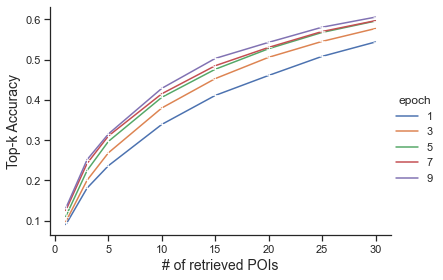

In [143]:

#sn.set_style('ticks')
sn.relplot(data=df, kind='line', x='cuts', y='score',hue='epoch', marker='+', dashes=True, height=4, aspect=1.4,palette="deep")
#plt.xlim(0, 100)
#plt.ylim(0, 0.9)
plt.xlabel("# of retrieved POIs",fontsize=14)
plt.ylabel("Top-k Accuracy",fontsize=14)
plt.savefig('../data/draw_fig/visualize_train.pdf',format='pdf',bbox_inches='tight')

# Human Eval

In [33]:
import json
with open('../data/human_eval/LOG_sp_17_hsp_16_bz_8_lr_2e-05_score_dot_loss_nll_name_True_loc_True_maxloc_5_dist_True_dw_0.5_haversine_False_seed_42_cluster_5_trainfile_train.json_testfile_test.json_distilbert-base-uncased__0_prediction.json') as f:
    data = json.load(f)
    
import random
random.shuffle(data)
r100 = data[:100]

count = 0
for piece in r100:
    piece['human_eval_top3_hit'] = []
    piece['prediction'] = piece['prediction'][:3]
    for p in piece['prediction'][:3]:
        if p in piece['all_answer_entity_list']:
            piece['human_eval_top3_hit'] = [p]
            
# with open('../data/human_eval/random100_eval.json','w') as f:
#     json.dump(r100,f,indent=2)

In [213]:
count = 0
with open('../data/human_eval/random100_eval.json') as f:
    d = json.load(f)
for p in d:
    if p['human_eval_top3_hit'] != []:
        count += 1
print(count)

75


In [44]:
with open('../data/TourQue_Knowledge_Cluster.json') as f:
    knowledge = json.load(f)

In [211]:
knowledge['10_R_12190']

{'review': ['The place is a bit gloomy and old fashioned - like the clientele to be honest (us included).\n',
  'We have been coming here for years but it appears to be under new management now.\n',
  'Very traditional surroundings but just what we wanted.\n',
  'It was brilliant, the food was good and the service was great.\n',
  'I visited the restaurant with a friend for pre show dinner.\n',
  'On the night we went the service was uncoordinated with staff not watching the tables with some left alone for ages and others over attended.\n',
  'good food and a friendly waiter topped by a smiley cook more then enough to eat and a great enviroment.\n',
  'You no longer have to pre order food which is good but goodness me, the service was very stretched.\n',
  'It picked up soon however and the food (steamed Halibut) was divine.\n',
  'They appeared understaffed too which did not help.\n',
  'Have booked to go again!\n',
  "At one point a member of the Front of House (it is in the ENO's Lo